In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
from os import environ
import torch

from hydra import initialize, compose
from hydra.utils import instantiate

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
environ["BLISS_HOME"] = "~/bliss"
with initialize(config_path=".", version_base=None):
    cfg = compose("config")

In [5]:
# evaluate on fields not trained on
test_path = "/data/scratch/aakash/test_small"
test_dataset = instantiate(cfg.cached_simulator, cached_data_path=test_path, splits="0:100/0:100/0:100")
trainer = instantiate(cfg.train.trainer, logger=None)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [6]:
BASE_PATH = "../../output/PSF_MODELS/single_field_base/checkpoints/epoch15.ckpt"
UNAWARE_PATH = "../../output/PSF_MODELS/multi_field_psf_unaware/checkpoints/epoch19.ckpt"
PARAMS_ONLY_PATH = "../../output/PSF_MODELS/multi_field_psf_params_only/checkpoints/epoch15.ckpt"

base_model = instantiate(cfg.encoder, image_normalizer={"concat_psf_params": False})
base_model.load_state_dict(torch.load(BASE_PATH)["state_dict"])
base_model.eval();

unaware_model = instantiate(cfg.encoder, image_normalizer={"concat_psf_params": False})
unaware_model.load_state_dict(torch.load(UNAWARE_PATH)["state_dict"])
unaware_model.eval();

params_only_model = instantiate(cfg.encoder, image_normalizer={"concat_psf_params": True})
params_only_model.load_state_dict(torch.load(PARAMS_ONLY_PATH)["state_dict"])
params_only_model.eval();

### Base model

In [9]:
base_results = trainer.test(base_model, datamodule=test_dataset)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    test/_counter_loss     │    0.08475611358880997    │
│        test/_loss         │    0.39238056540489197    │
│  test/avg_keep_distance   │    0.18196777999401093    │
│   test/beta_radians_mae   │    1.5647501945495605     │
│    test/bulge_frac_mae    │    0.3012164831161499     │
│    test/bulge_hlr_mae     │    0.5631142854690552     │
│     test/bulge_q_mae      │    0.3052403926849365     │
│      test/class_acc       │    0.7612460851669312     │
│ test/detection_precision  │    0.9305227994918823     │
│   test/detection_recall   │    0.4403432607650757     │
│    test/disk_frac_mae     │    0.3012164831161499     │
│     test/disk_hlr_mae     │    0.9785239696502686     │
│      test/disk_q_mae      │    0.24780182540416718    │
│          test/f1          │    0.5971264839172363     │
│   test/gal_fluxes_r_mae   │       341485.59375        │
│        test/gal_fp        │         35.46875          │
│        test/gal_tp        │         81.828125         │
│  test/star_fluxes_r_mae   │      40709.61328125       │
│       test/star_fp        │         8.078125          │
│       test/star_tp        │         56.96875          │
└───────────────────────────┴───────────────────────────┘

### PSF-unaware model

In [10]:
unaware_results = trainer.test(unaware_model, datamodule=test_dataset)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    test/_counter_loss     │   0.026966940611600876    │
│        test/_loss         │    0.11784785240888596    │
│  test/avg_keep_distance   │    0.2504214942455292     │
│   test/beta_radians_mae   │    1.5632692575454712     │
│    test/bulge_frac_mae    │    0.24722811579704285    │
│    test/bulge_hlr_mae     │    0.49087998270988464    │
│     test/bulge_q_mae      │    0.23317976295948029    │
│      test/class_acc       │    0.9024850130081177     │
│ test/detection_precision  │    0.9085810780525208     │
│   test/detection_recall   │    0.6969785094261169     │
│    test/disk_frac_mae     │    0.24722808599472046    │
│     test/disk_hlr_mae     │    0.9426685571670532     │
│      test/disk_q_mae      │    0.21818621456623077    │
│          test/f1          │    0.7886607646942139     │
│   test/gal_fluxes_r_mae   │        221573.875         │
│        test/gal_fp        │          9.09375          │
│        test/gal_tp        │        176.515625         │
│  test/star_fluxes_r_mae   │      33666.69140625       │
│       test/star_fp        │           19.0            │
│       test/star_tp        │         83.984375         │
└───────────────────────────┴───────────────────────────┘

### Concat params only model

In [12]:
params_results = trainer.test(params_only_model, datamodule=test_dataset)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [3]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    test/_counter_loss     │    0.0269169919192791     │
│        test/_loss         │    0.11494680494070053    │
│  test/avg_keep_distance   │    0.26034170389175415    │
│   test/beta_radians_mae   │    1.5642082691192627     │
│    test/bulge_frac_mae    │    0.24818094074726105    │
│    test/bulge_hlr_mae     │    0.47884154319763184    │
│     test/bulge_q_mae      │    0.22589336335659027    │
│      test/class_acc       │    0.9119241237640381     │
│ test/detection_precision  │    0.9155390858650208     │
│   test/detection_recall   │    0.6988715529441833     │
│    test/disk_frac_mae     │    0.24818094074726105    │
│     test/disk_hlr_mae     │    0.9008095860481262     │
│      test/disk_q_mae      │    0.2151637226343155     │
│          test/f1          │     0.792474091053009     │
│   test/gal_fluxes_r_mae   │        220633.9375        │
│        test/gal_fp        │          5.5625           │
│        test/gal_tp        │         180.40625         │
│  test/star_fluxes_r_mae   │      34634.34765625       │
│       test/star_fp        │         19.828125         │
│       test/star_tp        │         83.59375          │
└───────────────────────────┴───────────────────────────┘

### Concatenate results into dataframe

In [20]:
models = {
    "base": (base_model, base_results),
    "unaware": (unaware_model, unaware_results),
    "params": (params_only_model, params_results),
}

# Results
keys = list(base_results[0].keys())
data = { model_name: [results[0][key] for key in keys] for model_name, (_, results) in models.items() }
data_flat = pd.DataFrame.from_dict(data, orient="index", columns=[key.split("/")[1] for key in keys]).reset_index()
data_flat= data_flat.rename(columns={"index": "model"})
data_melt = pd.melt(data_flat, id_vars="model", value_vars=[key.split("/")[1] for key in keys], var_name="metric", value_name="value")
data_melt.to_csv("psf_model_results.csv")

from IPython.display import HTML
HTML(data_flat.to_html())

,model,_loss,_counter_loss,f1,detection_precision,detection_recall,avg_keep_distance,gal_tp,gal_fp,star_tp,star_fp,class_acc,disk_frac_mae,bulge_frac_mae,disk_q_mae,bulge_q_mae,disk_hlr_mae,bulge_hlr_mae,beta_radians_mae,gal_fluxes_r_mae,star_fluxes_r_mae
0,base,0.392381,0.084756,0.597126,0.930523,0.440343,0.181968,81.828125,35.468750,56.968750,8.078125,0.761246,0.301216,0.301216,0.247802,0.305240,0.978524,0.563114,1.564750,341485.59375,40709.613281
1,unaware,0.117848,0.026967,0.788661,0.908581,0.696979,0.250421,176.515625,9.093750,83.984375,19.000000,0.902485,0.247228,0.247228,0.218186,0.233180,0.942669,0.490880,1.563269,221573.87500,33666.691406
2,deconv,0.114982,0.026393,0.790191,0.907129,0.700185,0.260025,176.203125,10.578125,87.750000,15.375000,0.910239,0.251814,0.251814,0.217372,0.229742,0.921615,0.488658,1.564109,222217.75000,34408.417969
3,params,0.114947,0.026917,0.792474,0.915539,0.698872,0.260342,180.406250,5.562500,83.593750,19.828125,0.911924,0.248181,0.248181,0.215164,0.225893,0.900810,0.478842,1.564208,220633.93750,34634.347656
4,both,0.116036,0.027073,0.792906,0.916096,0.699241,0.248525,179.687500,6.671875,87.015625,16.156250,0.921085,0.251834,0.251834,0.217173,0.228502,0.905112,0.488529,1.564629,222322.40625,33708.800781


### Plot Results

In [28]:
def plot_results(data, ncols=3, title=None):
    sns.set_style('ticks')
    sns.set(font_scale=0.8)

    hue = "bin" if "bin" in data.columns else None

    g = sns.catplot(
        data,
        kind="bar",
        x="model", y="value", col="metric", hue=hue,
        sharex=False, sharey=False, col_wrap=ncols,
        height=3, aspect=1.5,
        palette="dark", alpha=0.6,
        legend=True
    )
    g.set_titles(template="{col_name}")

    for ax in g.axes:
        remove_ticks = False
        heights = []
        for container in ax.containers:
            heights.extend([rect.get_height() for rect in container.patches])
        median = np.median(heights)

        for container in ax.containers:
            orig_heights = [rect.get_height() for rect in container]
            # clip outlier heights
            for rect in container.patches:
                if rect.get_height() > np.abs(5 * median):
                    rect.set_height(np.abs(5 * median))
                    remove_ticks = True

            # add labels
            labels = ax.bar_label(container, labels=[f"{height:.3f}" for height in orig_heights], fontsize=6)

        new_heights = []
        for container in ax.containers:
            new_heights.extend([rect.get_height() for rect in container.patches])
        ax.set_ylim(min(0, min(new_heights) * 1.1 + 0.1), max(new_heights) * 1.1 + 0.1)

        ax.tick_params(axis="x", labelsize=6)

        # remove y ticks and labels
        if remove_ticks:
            ax.set(yticklabels=[])
    
    if title:
        fig = g.axes[-1].get_figure()
        plt.suptitle(title)
        fig.set_tight_layout(True)

/home/aakashdp/.cache/pypoetry/virtualenvs/bliss-deblender-av05Bskt-py3.10/lib/python3.10/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


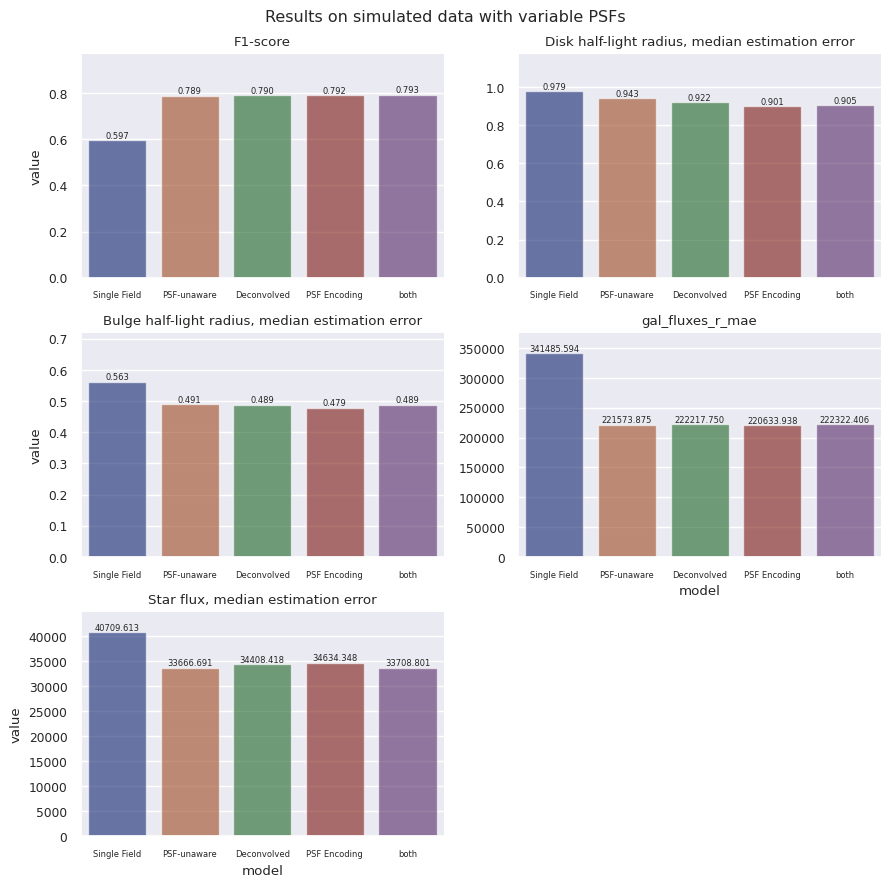

In [33]:
keep_keys = ["f1", "star_fluxes_r_mae", "gal_fluxes_r_mae", "disk_hlr_mae", "bulge_hlr_mae"]
data_to_plot = data_melt[np.isin(data_melt["metric"], keep_keys)]

data_to_plot = data_to_plot.replace({"base": "Single Field", "unaware": "PSF-unaware", "params": "PSF Encoding"})
data_to_plot = data_to_plot.replace({"f1": "F1-score", "galaxy_fluxes_r_mae": "Galaxy flux, median estimation error", "star_fluxes_r_mae": "Star flux, median estimation error", "disk_hlr_mae": "Disk half-light radius, median estimation error", "bulge_hlr_mae": "Bulge half-light radius, median estimation error"})
plot_results(data_to_plot, ncols=2, title="Results on simulated data with variable PSFs")